## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('daftar_nilai_final5.csv')
df

,Pendidikan Agama,Pendidikan Pancasila,Bahasa Inggris,Bahasa Mandarin,Matematika (Umum),Biologi,Fisika,Kimia,Geografi,Sejarah,...,"Pendidikan Jasmani, Olahraga, dan Kesehatan (Next Sem)",Informatika (Next Sem),Seni Musik (Next Sem),Bahasa Indonesia (Next Sem),Rata-rata (Next Sem),Kategori Performa,Kategori Performa (Next Sem),Jumlah Ketidakhadiran,Persentase Tugas,performance_trend
0,60,60,54,61,66,56,68,65,59,62,...,64,61,57,61,60.94,Low,Low,9,35,Stable Performance
1,49,70,60,61,59,56,58,51,71,53,...,65,63,51,74,63.38,Low,Low,10,40,Stable Performance
2,67,66,67,75,74,60,71,65,66,55,...,74,71,60,65,70.00,Low,Mid,6,63,Significant Increase Performance
3,73,67,71,69,69,66,62,62,71,68,...,68,77,65,63,68.38,Low,Low,6,30,Stable Performance
4,63,58,59,67,59,60,53,58,62,51,...,60,67,59,64,60.38,Low,Low,10,36,Stable Performance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,89,91,92,83,87,80,94,90,89,88,...,82,78,88,70,85.12,High,High,0,92,Stable Performance
4996,100,97,89,95,88,96,100,98,84,86,...,97,96,83,93,90.69,High,High,1,85,Stable Performance
4997,87,95,93,89,100,97,100,93,100,95,...,100,100,96,92,97.62,High,High,0,85,Stable Performance
4998,95,95,92,90,90,87,99,91,89,97,...,95,85,90,87,89.06,High,High,1,89,Stable Performance


# EDA

## Pengecekan Null

In [3]:
df.isnull().sum()

,0
Pendidikan Agama,0
Pendidikan Pancasila,0
Bahasa Inggris,0
Bahasa Mandarin,0
Matematika (Umum),0
Biologi,0
Fisika,0
Kimia,0
Geografi,0
Sejarah,0


## Pengecekan Duplikasi

In [4]:
df.duplicated().sum()

np.int64(0)

## Drop Unnecessary Column

In [5]:
drop_more_columns = [col for col in df.columns
                        if "(Next Sem)" in col]
drop_columns = ["performance_diff","performance_change"]
df = df.drop(drop_columns + drop_more_columns,axis=1, errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Pendidikan Agama                             5000 non-null   int64  
 1   Pendidikan Pancasila                         5000 non-null   int64  
 2   Bahasa Inggris                               5000 non-null   int64  
 3   Bahasa Mandarin                              5000 non-null   int64  
 4   Matematika (Umum)                            5000 non-null   int64  
 5   Biologi                                      5000 non-null   int64  
 6   Fisika                                       5000 non-null   int64  
 7   Kimia                                        5000 non-null   int64  
 8   Geografi                                     5000 non-null   int64  
 9   Sejarah                                      5000 non-null   int64  
 10  

In [6]:
df_1sem = df.iloc[:, 16:]
df_1sem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rata-rata              5000 non-null   float64
 1   Kategori Performa      5000 non-null   object 
 2   Jumlah Ketidakhadiran  5000 non-null   int64  
 3   Persentase Tugas       5000 non-null   int64  
 4   performance_trend      5000 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 195.4+ KB


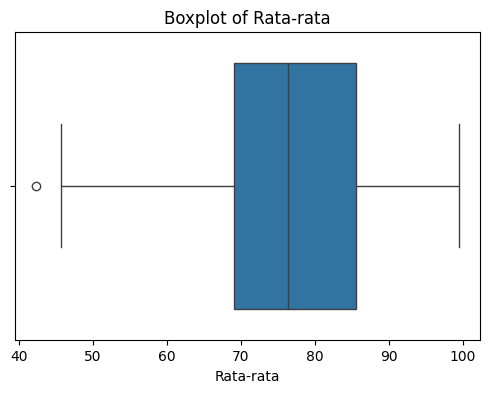

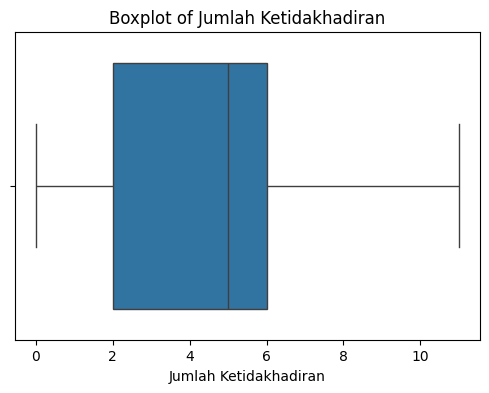

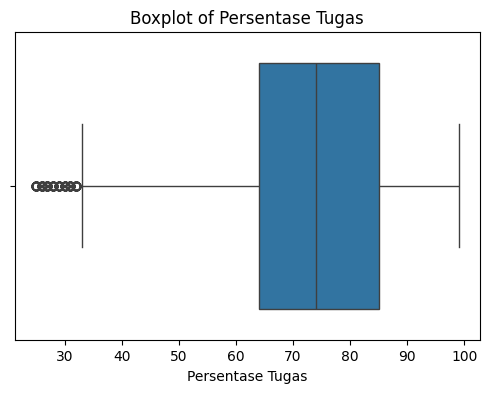

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = df_1sem.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_1sem[column])
    plt.title(f'Boxplot of {column}')
    plt.show()



In [8]:
df.shape

(5000, 21)

In [9]:
Q1 = df_1sem[numeric_cols].quantile(0.25)
Q3 = df_1sem[numeric_cols].quantile(0.75)
IQR = Q3 - Q1


df2 = df_1sem.copy()
for col in numeric_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df2[col] = df2[col].clip(lower_bound, upper_bound)  # Replace outliers with bounds

df2.shape

(5000, 5)

In [10]:
import pandas as pd

def count_iqr_outliers(df2):
    outlier_info = {}
    for column in df2.select_dtypes(include=['number']).columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
        outlier_info[column] = {
            'outlier_count': len(outliers),
            'outlier_indices': outliers.index.tolist(),
            'outlier_values': outliers[column].values
        }
    return outlier_info

# Example usage:
outliers_iqr = count_iqr_outliers(df2)
for col, info in outliers_iqr.items():
    print(f"Column '{col}': {info['outlier_count']} outliers")
    print(f"  Indices: {info['outlier_indices']}")
    print(f"  Values: {info['outlier_values']}\n")

Column 'Rata-rata': 0 outliers
  Indices: []
  Values: []

Column 'Jumlah Ketidakhadiran': 0 outliers
  Indices: []
  Values: []

Column 'Persentase Tugas': 0 outliers
  Indices: []
  Values: []



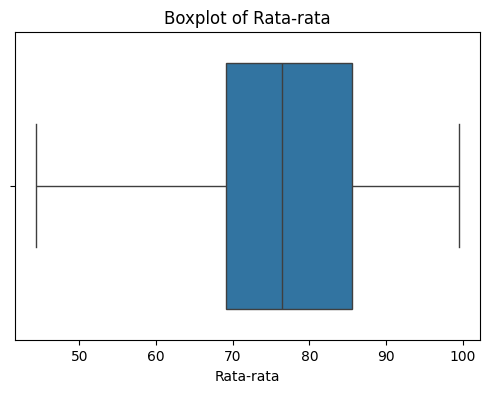

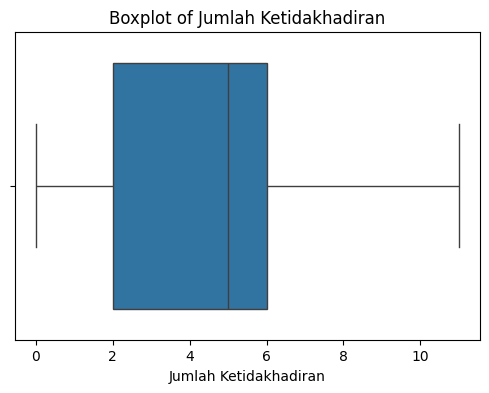

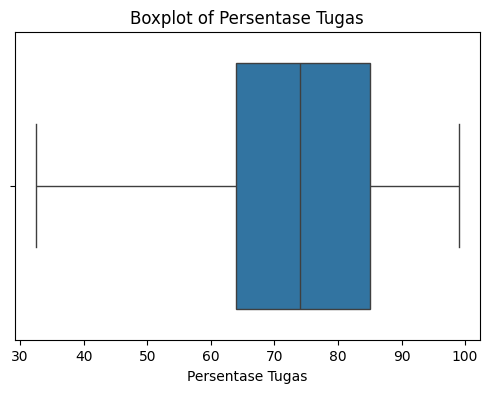

In [11]:
for column in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df2[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

         Rata-rata  Jumlah Ketidakhadiran  Persentase Tugas
count  5000.000000            5000.000000       5000.000000
mean     76.464523               4.645400         70.851100
std      11.467407               2.943228         18.645673
min      44.346250               0.000000         32.500000
25%      69.070000               2.000000         64.000000
50%      76.430000               5.000000         74.000000
75%      85.552500               6.000000         85.000000
max      99.460000              11.000000         99.000000


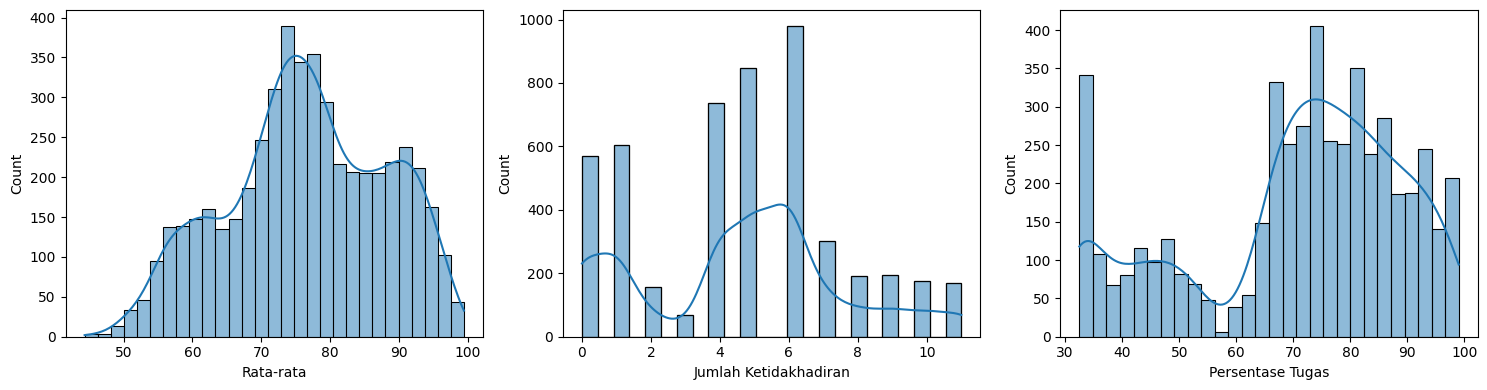

In [12]:

# Summary statistics
print(df2[["Rata-rata", "Jumlah Ketidakhadiran", "Persentase Tugas"]].describe())

# Histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df2["Rata-rata"], kde=True, ax=axes[0])
sns.histplot(df2["Jumlah Ketidakhadiran"], kde=True, ax=axes[1])
sns.histplot(df2["Persentase Tugas"], kde=True, ax=axes[2])
plt.tight_layout()
plt.show()

# # Boxplots for outliers
# fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# sns.boxplot(data=df["semester_avg"], ax=axes[0])
# sns.boxplot(data=df["absence_rate"], ax=axes[1])
# sns.boxplot(data=df["assignment_rate"], ax=axes[2])
# plt.tight_layout()
# plt.show()

In [13]:
print(df2["Persentase Tugas"].skew())  # Expect positive (right-skewed)
print(df2["Jumlah Ketidakhadiran"].skew())  # Expect positive (right-skewed)

-0.6727573627983788
0.08333407593563619


Distribution & Outlier

    Rata-rata (Average Score)
        scale from 40 - 100
        Normal Distribution & No outlier
        Interpretation: The range (50–100) is typical for grading systems. If most students cluster around the middle (e.g., 70–85) with fewer at extremes (50 or 100), this suggests normality.
        
    Persentase Tugas (Assignment Submission Rate):
        scale from 20-100 & No outlier
        Skewness = -0.80 → Left-skewed & No Outlier

        Interpretation: Most students have high submission rates (peak on the right), with a tail of few students having very low submission rates (left tail).

    Jumlah Ketidakhadiran (Absence Count):
        scale from 0-12 & No outlier
        Skewness = +0.64 → Right-skewed & No outlier
        Interpretation: Most students have low absence counts (peak on the left), with a tail of few students having very high absence counts (right tail).

## Preprocessing

In [14]:
df2.head()

,Rata-rata,Kategori Performa,Jumlah Ketidakhadiran,Persentase Tugas,performance_trend
0,62.10,Low,9,35.0,Stable Performance
1,58.93,Low,10,40.0,Stable Performance
2,64.96,Low,6,63.0,Significant Increase Performance
3,67.30,Low,6,32.5,Stable Performance
4,59.86,Low,10,36.0,Stable Performance


### Split Data 60/20/20

In [15]:
columns_train = ['Persentase Tugas', "Jumlah Ketidakhadiran", "Rata-rata"]
X = df2[columns_train]
y = df2['performance_trend']

from sklearn.model_selection import train_test_split



X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [16]:
X_val.head()

,Persentase Tugas,Jumlah Ketidakhadiran,Rata-rata
682,35.0,9,56.84
4312,88.0,0,93.29
647,34.0,7,57.99
878,39.0,6,61.28
777,41.0,8,58.26


In [17]:
y_val.head()

,performance_trend
682,Stable Performance
4312,Stable Performance
647,Stable Performance
878,Stable Performance
777,Stable Performance


### SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("Before SMOTE:", Counter(X_train))
print("Before SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(X_train_resampled))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({'Persentase Tugas': 1, 'Jumlah Ketidakhadiran': 1, 'Rata-rata': 1})
Before SMOTE: Counter({'Stable Performance': 2434, 'Significant Increase Performance': 325, 'Significant Decrease Performance': 241})
After SMOTE: Counter({'Persentase Tugas': 1, 'Jumlah Ketidakhadiran': 1, 'Rata-rata': 1})
After SMOTE: Counter({'Stable Performance': 2434, 'Significant Decrease Performance': 2434, 'Significant Increase Performance': 2434})


In [19]:
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_train_resampled_df.sample(5)

,Persentase Tugas,Jumlah Ketidakhadiran,Rata-rata
611,94.0,1,81.810000
6744,60.0,5,69.185557
2519,65.0,6,78.250000
5806,69.0,6,68.626735
287,97.0,0,91.220000


In [20]:
X_test.head()

,Persentase Tugas,Jumlah Ketidakhadiran,Rata-rata
1501,65.0,4,70.30
2586,60.0,7,67.85
2653,84.0,6,81.92
1055,72.0,4,72.61
705,32.5,7,62.56


### Scaling Numerical (Rata-rata, Jumlah Ketidakhadiran, Persentase Tugas)

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
import pandas as pd

# Assuming your features are named:
# ['rata_rata', 'persentase_tugas', 'jumlah_ketidakhadiran']
preprocessor = ColumnTransformer(
    transformers=[
        ('task_scaler', PowerTransformer(method='yeo-johnson'), ['Persentase Tugas']),  # Left-skewed
        ('absence_scaler', RobustScaler(), ['Jumlah Ketidakhadiran']),  # Right-skewed
        ('avg_scaler', StandardScaler(), ['Rata-rata']),           # Normal dist.
    ],
    remainder='passthrough'  # Ignore other columns (if any)
)

In [22]:
# Fit and transform
X_train_scaled = preprocessor.fit_transform(X_train_resampled_df)

# Output is a numpy array; convert back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                columns=X_train.columns)

In [23]:
X_train_scaled_df.head()

,Persentase Tugas,Jumlah Ketidakhadiran,Rata-rata
0,1.508199,-1.00,1.493872
1,-0.729466,-0.75,-0.447112
2,-1.371658,0.50,-2.010088
3,0.499577,0.00,-0.256579
4,-0.053637,-0.25,-0.214805


In [24]:
X_test_scaled = preprocessor.transform(X_test)  # No fitting!
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
X_test_scaled_df.head()

,Persentase Tugas,Jumlah Ketidakhadiran,Rata-rata
0,-0.667780,-0.25,-0.702853
1,-0.963439,0.50,-0.952481
2,0.757525,0.25,0.481096
3,-0.199416,-0.25,-0.467489
4,-2.056421,0.50,-1.491473


In [26]:
X_val_scaled = preprocessor.transform(X_val)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)

In [27]:
X_val_scaled_df.head()

,Persentase Tugas,Jumlah Ketidakhadiran,Rata-rata
0,-1.991607,1.00,-2.074278
1,1.121329,-1.25,1.639573
2,-2.018298,0.50,-1.957105
3,-1.874401,0.25,-1.621891
4,-1.809392,0.75,-1.929595


In [28]:
print("Original columns:", X_train_resampled_df.columns.tolist())
print("Scaled columns:", X_train_scaled_df.columns.tolist())

Original columns: ['Persentase Tugas', 'Jumlah Ketidakhadiran', 'Rata-rata']
Scaled columns: ['Persentase Tugas', 'Jumlah Ketidakhadiran', 'Rata-rata']


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler_avg = StandardScaler()
# df2['rata_rata_scaled'] = scaler_avg.fit_transform(df2[['Rata-rata']])

In [ ]:
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')
# df2['tugas_transformed'] = pt.fit_transform(df2[['Persentase Tugas']])

In [ ]:
# from sklearn.preprocessing import RobustScaler

# scaler_absence = RobustScaler()
# df2['absence_scaled'] = scaler_absence.fit_transform(df2[['Jumlah Ketidakhadiran']])

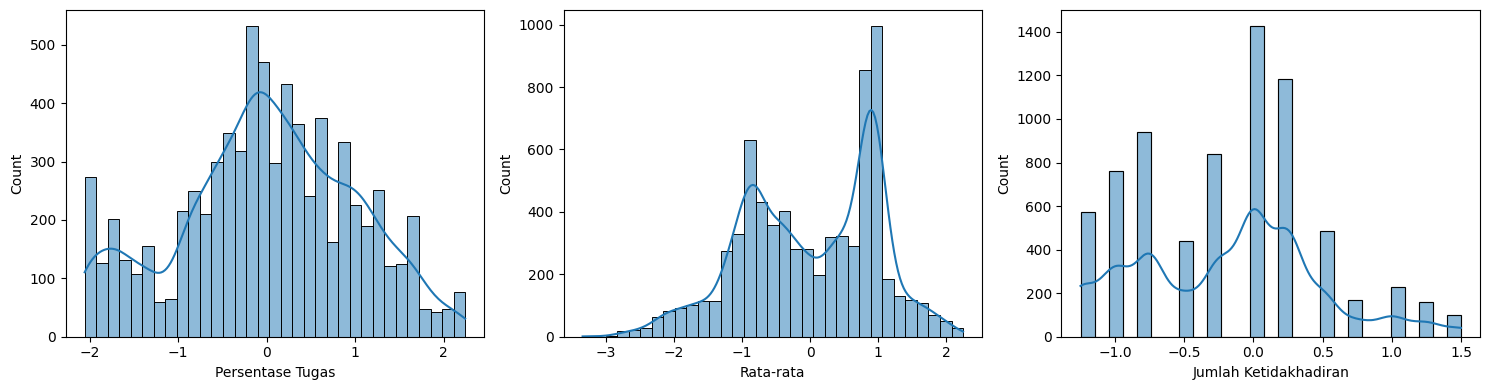

In [29]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(X_train_scaled_df['Persentase Tugas'], kde=True, ax=axes[0])
sns.histplot(X_train_scaled_df['Jumlah Ketidakhadiran'], kde=True, ax=axes[2])
sns.histplot(X_train_scaled_df['Rata-rata'], kde=True, ax=axes[1])
plt.tight_layout()
plt.show()


# sns.histplot(df2["Rata-rata"], kde=True, )
# sns.histplot(df2["Jumlah Ketidakhadiran"], kde=True, ax=axes[1])
# sns.histplot(df2["Persentase Tugas"], kde=True, ax=axes[2])
# plt.tight_layout()
# plt.show()

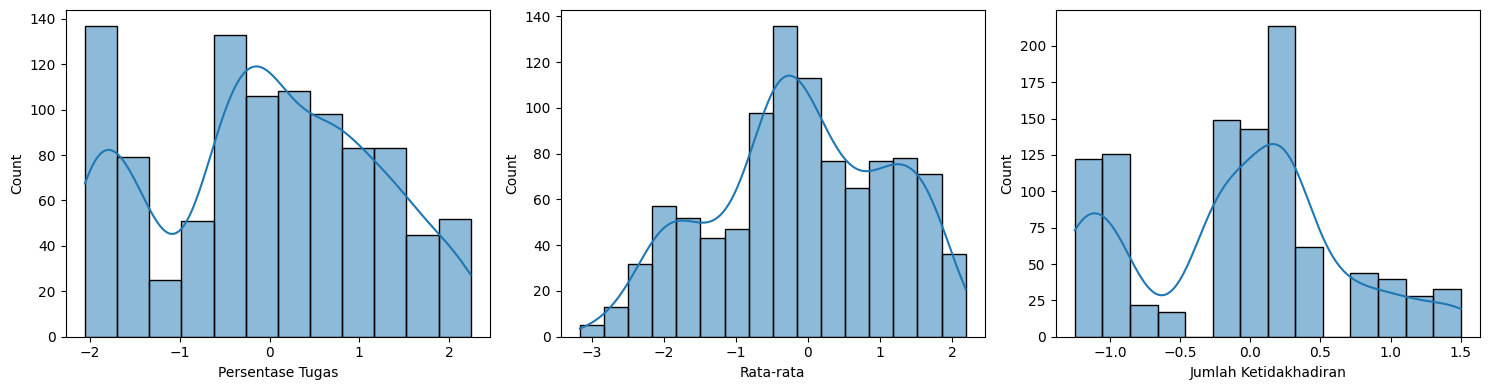

In [30]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(X_test_scaled_df['Persentase Tugas'], kde=True, ax=axes[0])
sns.histplot(X_test_scaled_df['Jumlah Ketidakhadiran'], kde=True, ax=axes[2])
sns.histplot(X_test_scaled_df['Rata-rata'], kde=True, ax=axes[1])
plt.tight_layout()
plt.show()


# sns.histplot(df2["Rata-rata"], kde=True, )
# sns.histplot(df2["Jumlah Ketidakhadiran"], kde=True, ax=axes[1])
# sns.histplot(df2["Persentase Tugas"], kde=True, ax=axes[2])
# plt.tight_layout()
# plt.show()

In [31]:
import numpy as np

print(len(np.unique(y_train_resampled)))

3


In [32]:
X_train_scaled_df.values

array([[ 1.50819918, -1.        ,  1.49387219],
       [-0.72946595, -0.75      , -0.44711171],
       [-1.37165792,  0.5       , -2.01008772],
       ...,
       [-0.95955659,  0.5       , -0.77870668],
       [ 0.06981203,  0.25      , -1.22539055],
       [ 0.84633406, -1.        ,  0.77915102]])

In [33]:
# import tensorflow as tf
# from tensorflow.keras import layers, models, callbacks
# from sklearn.metrics import classification_report, confusion_matrix

# # Assuming:
# # X_train_scaled_df: Scaled features (DataFrame)
# # y_train_resampled: Target labels (one-hot encoded if needed)
# # num_classes: Number of unique classes in your target

# num_classes = len(np.unique(y_train_resampled))  # Replace with your actual class count

# # Convert labels to one-hot if not already
# y_train_onehot = tf.keras.utils.to_categorical(y_train_resampled, num_classes)
# y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix

# Assume y_train_resampled contains strings like 'increased', 'decreased'
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

num_classes = len(label_encoder.classes_)  # Get number of unique classes

# Convert to one-hot
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded, num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes)
y_val_onehot = tf.keras.utils.to_categorical(y_val_encoded, num_classes)

In [34]:
print(label_encoder.classes_)

['Significant Decrease Performance' 'Significant Increase Performance'
 'Stable Performance']


In [35]:
print(y_train_onehot.dtype)  # Should show float32, not object

float64


In [36]:
from tensorflow.keras.regularizers import l2

model = models.Sequential([
      layers.Dense(128, activation='relu', input_shape=(X_train_scaled_df.shape[1],)),
      layers.Dropout(0.3),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(num_classes, activation='softmax')  # Multi-class output

      # layers.Dense(128, activation='relu', input_shape=(X_train_scaled_df.shape[1],), kernel_regularizer=l2(0.01)),
      # layers.Dropout(0.5),  # Increased dropout
      # layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
      # layers.Dropout(0.3),
      # layers.Dense(4, activation='softmax')



      # layers.Dense(128, activation='relu', input_shape=(X_train_scaled_df.shape[1],), kernel_regularizer=l2(0.01)),
      # layers.Dropout(0.4),
      # layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
      # layers.Dropout(0.3),
      # layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Bottleneck
      # layers.Dense(4, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multi-class
    metrics=['accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')]
)

callbacks = [
    # Stop training if val_loss doesn't improve for 10 epochs
    callbacks.EarlyStopping(patience=5, monitor='val_loss', mode='min', verbose=1),

    # Save the best model
    callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min'
    ),

    # Log training progress (optional)
    callbacks.CSVLogger('training_log.csv')
]

history = model.fit(
    X_train_scaled_df.values,  # Ensure input is NumPy array
    y_train_onehot,
    validation_data=(X_val_scaled, y_val_onehot),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
221/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5887 - loss: 0.8702 - precision: 0.7150 - recall: 0.2899

229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5919 - loss: 0.8641 - precision: 0.7170 - recall: 0.2984 - val_accuracy: 0.5850 - val_loss: 0.7273 - val_precision: 0.5918 - val_recall: 0.5320
Epoch 2/100
216/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7519 - loss: 0.5277 - precision: 0.7762 - recall: 0.7198

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7534 - loss: 0.5255 - precision: 0.7776 - recall: 0.7214 - val_accuracy: 0.6660 - val_loss: 0.5799 - val_precision: 0.6780 - val_recall: 0.6360
Epoch 3/100
207/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3749 - precision: 0.8650 - recall: 0.8256

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8524 - loss: 0.3722 - precision: 0.8666 - recall: 0.8279 - val_accuracy: 0.8510 - val_loss: 0.3356 - val_precision: 0.8580 - val_recall: 0.8400
Epoch 4/100
228/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9077 - loss: 0.2608 - precision: 0.9183 - recall: 0.8963

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9077 - loss: 0.2606 - precision: 0.9183 - recall: 0.8964 - val_accuracy: 0.9110 - val_loss: 0.2331 - val_precision: 0.9177 - val_recall: 0.9030
Epoch 5/100
215/229 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9197 - loss: 0.2180 - precision: 0.9300 - recall: 0.9099

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9201 - loss: 0.2171 - precision: 0.9303 - recall: 0.9103 - val_accuracy: 0.9190 - val_loss: 0.2065 - val_precision: 0.9225 - val_recall: 0.9160
Epoch 6/100
227/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9427 - loss: 0.1665 - precision: 0.9471 - recall: 0.9352

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9427 - loss: 0.1664 - precision: 0.9471 - recall: 0.9352 - val_accuracy: 0.9430 - val_loss: 0.1485 - val_precision: 0.9445 - val_recall: 0.9360
Epoch 7/100
228/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9482 - loss: 0.1494 - precision: 0.9530 - recall: 0.9418

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9482 - loss: 0.1493 - precision: 0.9530 - recall: 0.9418 - val_accuracy: 0.9620 - val_loss: 0.1060 - val_precision: 0.9648 - val_recall: 0.9590
Epoch 8/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9572 - loss: 0.1280 - precision: 0.9611 - recall: 0.9544 - val_accuracy: 0.9550 - val_loss: 0.1190 - val_precision: 0.9567 - val_recall: 0.9500
Epoch 9/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9616 - loss: 0.1085 - precision: 0.9648 - recall: 0.9590 - val_accuracy: 0.9550 - val_loss: 0.1158 - val_precision: 0.9567 - val_recall: 0.9510
Epoch 10/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9595 - loss: 0.1086 - precision: 0.9631 - recall: 0.9580 - val_accuracy: 0.9420 - val_loss: 0.1342 - val_precision: 0.9456 - val_recall: 0.9380
Epoch 11/100
223/229 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.0998 - precision: 0.9683 - recall: 0.9639

229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9658 - loss: 0.0999 - precision: 0.9683 - recall: 0.9639 - val_accuracy: 0.9570 - val_loss: 0.0967 - val_precision: 0.9627 - val_recall: 0.9560
Epoch 12/100
223/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9672 - loss: 0.0944 - precision: 0.9690 - recall: 0.9649

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9672 - loss: 0.0943 - precision: 0.9690 - recall: 0.9649 - val_accuracy: 0.9660 - val_loss: 0.0886 - val_precision: 0.9678 - val_recall: 0.9610
Epoch 13/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.0854 - precision: 0.9701 - recall: 0.9660 - val_accuracy: 0.9650 - val_loss: 0.0908 - val_precision: 0.9649 - val_recall: 0.9610
Epoch 14/100
218/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.0807 - precision: 0.9733 - recall: 0.9699

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9722 - loss: 0.0809 - precision: 0.9732 - recall: 0.9697 - val_accuracy: 0.9630 - val_loss: 0.0865 - val_precision: 0.9649 - val_recall: 0.9610
Epoch 15/100
212/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.0632 - precision: 0.9813 - recall: 0.9763

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0642 - precision: 0.9808 - recall: 0.9760 - val_accuracy: 0.9760 - val_loss: 0.0685 - val_precision: 0.9760 - val_recall: 0.9740
Epoch 16/100
218/229 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9702 - loss: 0.0811 - precision: 0.9705 - recall: 0.9685

229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0807 - precision: 0.9708 - recall: 0.9687 - val_accuracy: 0.9830 - val_loss: 0.0521 - val_precision: 0.9830 - val_recall: 0.9830
Epoch 17/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9702 - loss: 0.0806 - precision: 0.9708 - recall: 0.9684 - val_accuracy: 0.9450 - val_loss: 0.1185 - val_precision: 0.9468 - val_recall: 0.9440
Epoch 18/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9737 - loss: 0.0699 - precision: 0.9746 - recall: 0.9723 - val_accuracy: 0.9630 - val_loss: 0.0936 - val_precision: 0.9649 - val_recall: 0.9610
Epoch 19/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9719 - loss: 0.0730 - precision: 0.9733 - recall: 0.9703 - val_accuracy: 0.9630 - val_loss: 0.0836 - val_precision: 0.9639 - val_recall: 0.9600
Epoch 20/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9787 - loss: 0.0620 - precision: 0.9797 - recall: 0.9776 - val_accuracy: 0.9630 - val_loss: 0.094

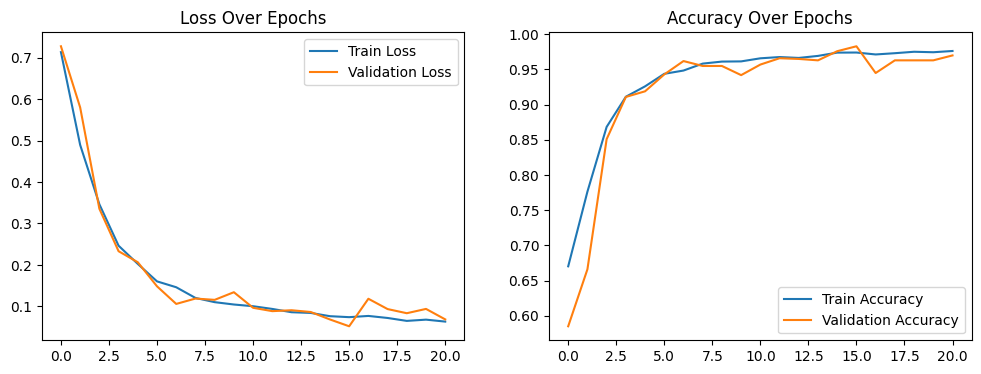

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88        84
           1       0.88      0.98      0.93        94
           2       1.00      0.96      0.98       822

    accuracy                           0.96      1000
   macro avg       0.89      0.97      0.93      1000
weighted avg       0.97      0.96      0.97      1000



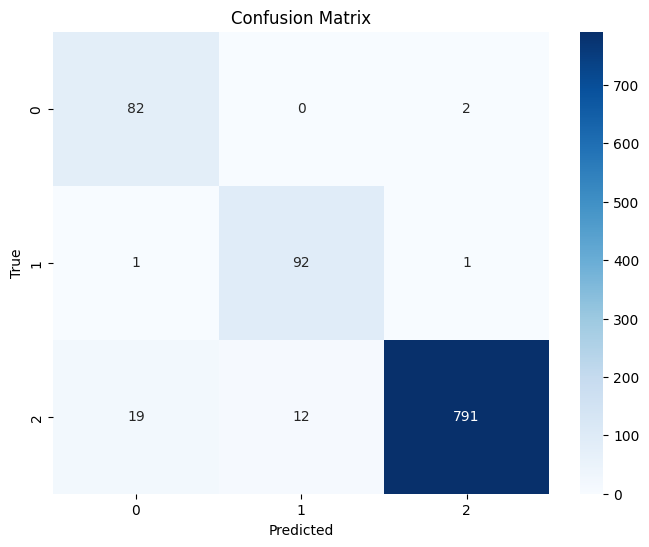

In [38]:
# Predict classes
y_pred = model.predict(X_test_scaled_df)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_true_classes),
            yticklabels=np.unique(y_true_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
best_model = tf.keras.models.load_model('best_model.h5')
test_loss, test_acc, test_precision, test_recall = best_model.evaluate(X_test_scaled_df, y_test_onehot)
print(f"Test Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9832 - loss: 0.0516 - precision: 0.9834 - recall: 0.9806
Test Accuracy: 0.9840, Precision: 0.9850, Recall: 0.9820


In [40]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [41]:



# === 1. Load model and preprocessors ===
model_inf = load_model("best_model.h5")
label_encoder_inf = joblib.load('label_encoder.pkl')
preprocessor_inf = joblib.load('preprocessor.pkl')

# === 2. Input data from user ===
new_assignment_rate = int(input("Masukkan Persentase Tugas: "))
new_absent_rate = int(input("Masukkan Jumlah Ketidakhadiran: "))
new_avg_score = int(input("Masukkan Rata-rata seluruh nilai: "))

# === 3. Create DataFrame ===
new_data = pd.DataFrame([{
    'Persentase Tugas': new_assignment_rate,
    'Jumlah Ketidakhadiran': new_absent_rate,
    'Rata-rata': new_avg_score
}])

# === 4. Apply preprocessing ===
X_input = preprocessor_inf.transform(new_data)  # shape: (1, 3)

# === 5. Predict ===
y_pred_proba = model_inf.predict(X_input)
predicted_class_index = np.argmax(y_pred_proba, axis=1)[0]
predicted_label = label_encoder_inf.inverse_transform([predicted_class_index])[0]

print("\n📊 Predicted Performance Trend:", predicted_label)


# # # === 3. Apply preprocessing to each feature ===
# # avg_scaled = scaler_avg.transform(np.array([[new_avg_score]]))            # shape: (1,1)
# # absent_scaled = scaler_absent.transform(np.array([[new_absent_rate]]))    # shape: (1,1)
# # assign_scaled = scaler_assign.transform(np.array([[new_assignment_rate]]))# shape: (1,1)
# new_assignment_rate = int(input("Masukkan Persentase Tugas: "))
# new_absent_rate = int(input("Masukkan Jumlah Ketidakhadiran: "))
# new_avg_score = int(input("Masukkan Rata-rata seluruh nilai: "))


# new_data = pd.DataFrame([{
#     'Persentase Tugas': new_assignment_rate,
#     'Jumlah Ketidakhadiran': new_absent_rate,
#     'Rata-rata': new_avg_score
# }])

# # === 4. Combine into model input ===
# X_input = preprocessor.transform(new_data)        # shape: (1,3)

# # === 5. Predict and decode ===
# y_pred_proba = model.predict(X_input)  # shape (1, num_classes)

# # === 3. Convert from one-hot to class label ===
# predicted_class_index = np.argmax(y_pred_proba, axis=1)[0]
# predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

# print("Predicted label:", predicted_label)
# # pred_proba = model.predict(X_input)
# # pred_class = np.argmax(pred_proba)

# # label_map = {
# #     0: "Significant Decrease Performance",
# #     1: "Stable Performance",
# #     2: "Significant Increase Performance"
# # }

# # print("Predicted Performance Trend:", label_map[pred_class])



# # from sklearn.preprocessing import LabelEncoder
# # encoder = joblib.load("label_encoder.pkl")
# # encoder.inverse_transform([pred_class])[0]


Masukkan Persentase Tugas: 80
Masukkan Jumlah Ketidakhadiran: 2
Masukkan Rata-rata seluruh nilai: 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

📊 Predicted Performance Trend: Significant Increase Performance


In [ ]:
# from flask import Flask, request, jsonify
# import numpy as np
# import pandas as pd
# import joblib
# from tensorflow.keras.models import load_model

# app = Flask(__name__)

# # Load model and preprocessors
# model = load_model("best_model.h5")
# preprocessor = joblib.load("preprocessor.pkl")
# label_encoder = joblib.load("label_encoder.pkl")

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.get_json()

#     try:
#         # Extract input features
#         tugas = float(data['Persentase Tugas'])
#         absen = float(data['Jumlah Ketidakhadiran'])
#         rata = float(data['Rata-rata'])

#         # Convert to DataFrame
#         df = pd.DataFrame([{
#             'Persentase Tugas': tugas,
#             'Jumlah Ketidakhadiran': absen,
#             'Rata-rata': rata
#         }])

#         # Preprocess
#         X_input = preprocessor.transform(df)

#         # Predict
#         y_pred_proba = model.predict(X_input)
#         predicted_index = np.argmax(y_pred_proba, axis=1)[0]
#         predicted_label = label_encoder.inverse_transform([predicted_index])[0]

#         return jsonify({
#             'predicted_label': predicted_label,
#             'probabilities': y_pred_proba[0].tolist()
#         })

#     except Exception as e:
#         return jsonify({'error': str(e)})

# if __name__ == '__main__':
#     app.run(debug=True)


### Encode Kategorikal (Kategori Performa)*

###  Feature Engineering (Interactive Columns)*

## Modelling

### FNN

### RNN

## Inference

## Reference Code

In [ ]:
# # Plot grouped bars
# cross_tab.plot(kind='bar', figsize=(12, 6), colormap='viridis')
# plt.title('Performance Categories by Trend Status')
# plt.xlabel('Performance Level')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.legend(title='Performance Final')
# plt.show()

# cross_tab = pd.crosstab(
#     index=df_final['Kategori Performa'],
#     columns=df_final['performance_trend'],
#     values=df_final['Jumlah Ketidakhadiran'],
#     aggfunc='sum'
# )

# # Plot heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(cross_tab, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5)
# plt.title('Total Absences by Performance and Trend Categories')
# plt.xlabel('Performance Trend')
# plt.ylabel('Performance Category')
# plt.show()

# import seaborn as sns


# # Create cross-tabulation
# cross_tab = pd.crosstab(df_final['Kategori Performa'], df_final['performance_trend'])

# # Plot heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
# plt.title('Relationship Between Performance and Performance Trends')
# plt.xlabel('Performance Trend')
# plt.ylabel('Performance')
# plt.show()
# # Create cross-tab with values as sum of absences

# import matplotlib.pyplot as plt

# # Set up the figure
# plt.figure(figsize=(12, 6))

# # First subplot - performance distribution
# plt.subplot(1, 2, 1)
# df_final['Kategori Performa'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
# plt.title('Performance Distribution')
# plt.xlabel('Performance Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45)

# # Second subplot - performance_final distribution
# plt.subplot(1, 2, 2)
# df_final['performance_trend'].value_counts().plot(kind='bar', color=['#d62728', '#9467bd', '#8c564b'])
# plt.title('Performance Trend Distribution')
# plt.xlabel('Performance Trend Category')
# plt.ylabel('Count')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

# df_final.info()
# df_final['performance_trend'].value_counts()

# # Pivot table for cleaner layout
# pivot_table = df_final.pivot_table(
#     values='Jumlah Ketidakhadiran',
#     index='Kategori Performa',
#     columns='performance_trend',
#     aggfunc='count',
#     fill_value=0
# )
# print(pivot_table)

# # Crosstab for frequency analysis
# crosstab = pd.crosstab(
#     df_final['Kategori Performa'],
#     df_final['performance_trend'],
#     margins=True
# )
# print(crosstab)

# # Stacked bar chart
# df_final.groupby(['Kategori Performa', 'performance_trend']).size().unstack().plot(kind='bar', stacked=True)
# plt.title('Performance Trends by Category')
# plt.show()

# # Heatmap
# pivot_data = df_final.pivot_table(values='Jumlah Ketidakhadiran', index='Kategori Performa', columns='performance_trend', aggfunc='count')
# sns.heatmap(pivot_data, annot=True, fmt='g')
# plt.show()

# df_final.info()
# df_final['performance'].value_counts()

# conditions = [
#     df_final['Rata-rata'] > df_final['Rata-rata (Next Sem)'],
#     df_final['Rata-rata'] < df_final['Rata-rata (Next Sem)'],
#     df_final['Rata-rata'] == df_final['Rata-rata (Next Sem)']
# ]

# choices = [
#     'decreased performance',
#     'increased performance',
#     'stable performance'
# ]

# df_final['performance_trend'] = np.select(conditions, choices)

# df_final['performance'] = df_final['Rata-rata'].apply(
#     lambda x: 'low performer' if x < 70 else (
#         'average performer' if 70 <= x < 85 else 'high performer'
#     )
# )

# df_final[['Kategori Performa', 'Kategori Performa (Next Sem)', 'Jumlah Ketidakhadiran']].value_counts().head(10)

## Tambah Kasus yang bervariasi
_Tambah siswa dengan nilai sangat rendah,etc.

## Tambah Kolom Absensi

In [ ]:
# # Re-import necessary modules after code execution environment reset
# import pandas as pd
# import numpy as np

# np.random.seed(42)

# # daftar subjek
# subjects = [
#     "Pendidikan Agama", "Pendidikan Pancasila", "Bahasa Inggris", "Bahasa Mandarin",
#     "Matematika (Umum)", "Biologi", "Fisika", "Kimia", "Geografi", "Sejarah",
#     "Sosiologi", "Ekonomi", "Pendidikan Jasmani, Olahraga, dan Kesehatan",
#     "Informatika", "Seni Musik", "Bahasa Indonesia"
# ]

# # students yang bakal di generate
# n_students = 1000

# # Simulasi semester sekarang
# low_count = int(0.2 * n_students)
# mid_count = int(0.5 * n_students)
# high_count = n_students - low_count - mid_count

# low_avg = np.random.normal(loc=60, scale=5, size=low_count)
# mid_avg = np.random.normal(loc=75, scale=5, size=mid_count)
# high_avg = np.random.normal(loc=90, scale=5, size=high_count)

# base_averages = np.concatenate([low_avg, mid_avg, high_avg])
# base_averages = np.clip(base_averages, 0, 100)

# # Simulasi skor subjek per murid
# grades_current = np.array([
#     base + np.random.normal(loc=0, scale=5, size=len(subjects))
#     for base in base_averages
# ])
# grades_current = np.clip(grades_current, 0, 100)

# # dataframe
# df = pd.DataFrame(grades_current, columns=subjects)
# df['Rata-rata'] = df.mean(axis=1)

# # Mask
# low_mask = df['Rata-rata'] < 70
# mid_mask = (df['Rata-rata'] >= 70) & (df['Rata-rata'] < 85)
# high_mask = df['Rata-rata'] >= 85

# df_next_sem = df[subjects].copy()

# def add_noise(data, loc=0, scale=5):
#     return np.clip(data + np.random.normal(loc=loc, scale=scale, size=data.shape), 0, 100)

# # Low performers
# indices = df[low_mask].index.to_numpy()
# np.random.shuffle(indices)
# n = len(indices)
# df_next_sem.loc[indices[:int(0.7 * n)]] = add_noise(df_next_sem.loc[indices[:int(0.7 * n)]], loc=5, scale=4)
# df_next_sem.loc[indices[int(0.7 * n):int(0.9 * n)]] = add_noise(df_next_sem.loc[indices[int(0.7 * n):int(0.9 * n)]], loc=0, scale=3)
# df_next_sem.loc[indices[int(0.9 * n):]] = add_noise(df_next_sem.loc[indices[int(0.9 * n):]], loc=15, scale=5)

# # Mid performers
# indices = df[mid_mask].index.to_numpy()
# np.random.shuffle(indices)
# n = len(indices)
# df_next_sem.loc[indices[:int(0.6 * n)]] = add_noise(df_next_sem.loc[indices[:int(0.6 * n)]], loc=0, scale=3)
# df_next_sem.loc[indices[int(0.6 * n):int(0.9 * n)]] = add_noise(df_next_sem.loc[indices[int(0.6 * n):int(0.9 * n)]], loc=5, scale=4)
# df_next_sem.loc[indices[int(0.9 * n):]] = add_noise(df_next_sem.loc[indices[int(0.9 * n):]], loc=-7, scale=5)

# # High performers
# indices = df[high_mask].index.to_numpy()
# np.random.shuffle(indices)
# n = len(indices)
# df_next_sem.loc[indices[:int(0.8 * n)]] = add_noise(df_next_sem.loc[indices[:int(0.8 * n)]], loc=-3, scale=3)
# df_next_sem.loc[indices[int(0.8 * n):]] = add_noise(df_next_sem.loc[indices[int(0.8 * n):]], loc=0, scale=2)

# # pembulatan dan pergantian nama df
# df_next_sem = df_next_sem.round().astype(int)
# df_next_sem.columns = [col + " (Next Sem)" for col in df_next_sem.columns]

# # kombinasi
# df_final = pd.concat([df, df_next_sem], axis=1)
# df_final['Rata-rata (Next Sem)'] = df_next_sem.mean(axis=1).round(2)

# # Kategori berdasarkan performa dan perubahan
# df_final['Kategori Performa'] = "Unlabeled"
# df_final.loc[low_mask, 'Kategori Performa'] = "Low"
# df_final.loc[mid_mask, 'Kategori Performa'] = "Mid"
# df_final.loc[high_mask, 'Kategori Performa'] = "High"

# # Kategori perubahan
# df_final['Kategori Performa (Next)'] = pd.cut(
#     df_final['Rata-rata (Next Sem)'],
#     bins=[-1, 70, 85, 100],
#     labels=["Low", "Mid", "High"]
# )

# # Tambahkan jumlah ketidakhadiran berdasarkan kategori performa
# def generate_absences(current, future):
#     if current == "Low" and future == "High":
#         return np.random.randint(0, 4)
#     elif current == "Low" and future == "Low":
#         return np.random.randint(7, 16)
#     elif current == "Mid" and future == "Mid":
#         return np.random.randint(2, 9)
#     elif current == "Mid" and future == "High":
#         return np.random.randint(0, 7)
#     elif current == "High":
#         return np.random.randint(0, 5)
#     else:
#         return np.random.randint(1, 10)

# df_final['Jumlah Ketidakhadiran'] = df_final.apply(
#     lambda row: generate_absences(row['Kategori Performa'], row['Kategori Performa (Next)']),
#     axis=1
# )

# df_final[['Kategori Performa', 'Kategori Performa (Next)', 'Jumlah Ketidakhadiran']].value_counts().head(10)


## Hapus Kolom Tidak Digunakan

In [ ]:
# More realistic subject correlations
stem_subjects = ["Matematika (Umum)", "Biologi", "Fisika", "Kimia"]
language_subjects = ["Bahasa Indonesia", "Bahasa Inggris", "Bahasa Mandarin"]
# Apply different correlation patterns

# More conservative improvement ranges
# Low performers: +2 to +8 instead of +15
# High performers: -1 to +2 instead of -3